# __University Ranking Analysis__ 



__Project Content__
1. Business Understanding and Ask Questions
2. Data Understanding
3. Data Cleaning
4. Data Transformation
5. Data Visualization 
6. Conclusions or Answer the questions

<font color='red'>[Noted]<font color='blue'> University
1. Clean data / Transform data
2. Filter data เพื่อหาคำตอบ
	- str.contains
	- groupby
	- pivot_table
3. Plot chart with Pandas Library
	- bar
	- line
	- box
4. Conclusion สรุปข้อมูลใน ppt

# <font color='blue'>__1.Business Understanding__</font>

If you want to study in Thailand, then you need to know which of its universities are right for you. The World University Rankings take the top institutions in the world, and look at their performance across all of their core objectives: teaching, research, knowledge transfer and international outlook and represent them in the world rank column. The data set is the latest ranking updates related to universities in Thailand since 2013 to 2023

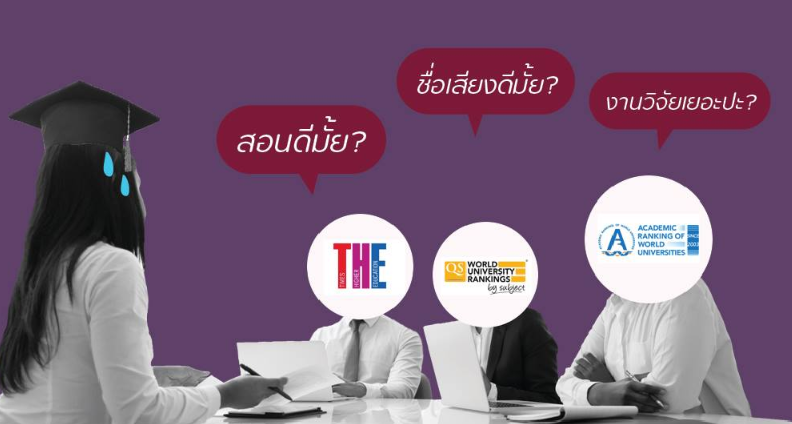

ข้อมูลที่ใช้ในการวิเคราะห์เป็นจัดอันดับมหาวิทยาลัยโลกด้วยระบบ Webometrics Ranking of World University จะมีการประกาศผลการจัดอันดับเว็บไซต์ 2 ครั้งต่อปี คือช่วงเดือนมกราคม และช่วงเดือนกรกฎาคม ของทุกปี ทั้งนี้ การจัดอันดับเว็บไซต์นั้น__ไม่ได้มีวัตถุประสงค์ในเชิงคุณภาพของสถานศึกษา__  แต่เป็นการวัดผลงานทางวิชาการที่มีการเผยแพร่ทางอินเทอร์เน็ต นอกเหนือจากผลงานที่มีการตีพิมพ์ลงในวารสาร หรือมองอีกแง่หนึ่งก็คือ __วัดความสามารถในการเป็น "มหาวิทยาลัยอิเล็กทรอนิกส์ (E-university)__

[เอกสารอ้างอิง](https://repository.rmutp.ac.th/bitstream/handle/123456789/2462/IRD_61_52.pdf?sequence=1&isAllowed=y)

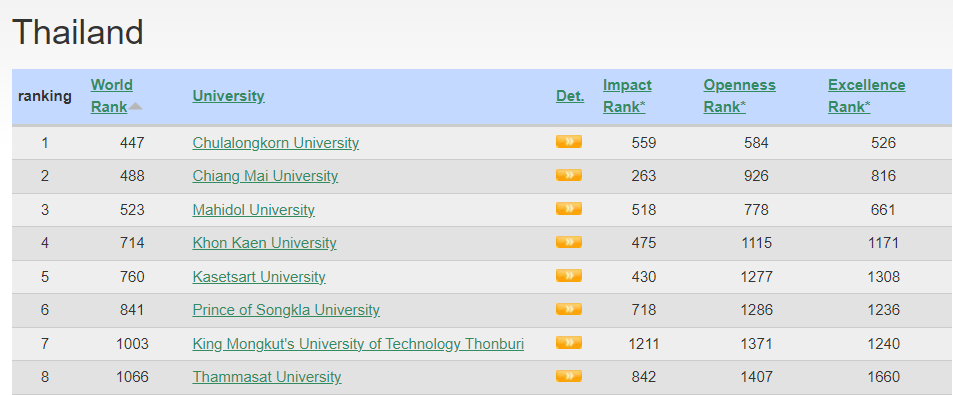

__Import libraries ที่จำเป็นต่อการวิเคราะห์ข้อมูล__

In [ ]:
import numpy as np
import pandas as pd

__อ่านข้อมูล excel file__

In [ ]:
df = pd.read_excel('/content/Dataset 2 - World_ranking_university.xlsx')

# <font color='blue'>__2.Data Understanding__

In [ ]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'ranking', 'world_rank', 'university',
       'impact', 'openness', 'excellence'],
      dtype='object')

In [ ]:
df.shape

(3872, 9)

In [ ]:
df.head()

,Unnamed: 0,year,month,ranking,world_rank,university,impact,openness,excellence
0,0,2013,1,1,169,Chulalongkorn University,68,483,562
1,1,2013,1,3,299,Kasetsart University,174,387,1161
2,2,2013,1,5,436,Khon Kaen University,263,1156,1109
3,3,2013,1,7,514,Thammasat University,312,1253,1346
4,4,2013,1,9,697,King Mongkut's Institute of Technology Ladkrabang,323,2017,1538


ขนาดของข้อมูลที่นำมาวิเคราะห์ มี 3,872 แถว  9 คอลัมน์ <br>

1.   Year : ตั้งแต่ปี 2013 - 2023
2.   month : เก็บข้อมูล เดือน 1 กับ เดือน 6
3.   ranking : การอันดับในประเทศไทย
4.   world_rank : การอันดับระดับนานาชาติ
5.   university : รายชื่อมหาวิทยาลัย, สถาบัน, รร.
6.   impact : ประเมินด้านการเชื่อมโยงลิงค์จากภายนอก (จำนวนของเว็บไซต์อื่นที่มีลิงค์มาถึงเรา)
7.   openness : การประเมินด้านจำนวนไฟล์เอกสารที่นำเสนอไว้บนเว็บไซต์ ประเภท Acrobat (.pdf), MS Word (.doc , .docx), MS Excel 
8.   excellence : การประเมินทางด้านเอกสารทางวิชาการที่มีการเผยแพร่ ตีพิมพ์ในวารสารต่างๆ และระดับนานาชาติของมหาวิทยาลัย

# <font color='blue'>__3.Data Cleaning__</font>

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,year,month,ranking,world_rank,university,impact,openness,excellence
0,2013,1,1,169,Chulalongkorn University,68,483,562
1,2013,1,3,299,Kasetsart University,174,387,1161
2,2013,1,5,436,Khon Kaen University,263,1156,1109
3,2013,1,7,514,Thammasat University,312,1253,1346
4,2013,1,9,697,King Mongkut's Institute of Technology Ladkrabang,323,2017,1538


In [ ]:
df['university'].unique()

array(['Chulalongkorn University', 'Kasetsart University',
       'Khon Kaen University', 'Thammasat University',
       "King Mongkut's Institute of Technology Ladkrabang",
       'Naresuan University', 'Ramkhamhaeng University',
       'Mahasarakham University', 'Silpakorn University',
       'Asian Institute of Technology Thailand',
       'Ubonratchathani University', 'Walailak University',
       'Mahanakorn University of Technology',
       'Huachiew Chalermprakiet University', 'Loei Rajabhat University',
       'Yala Rajabhat University',
       'National Institute of Development Administration',
       'Sripatum University', 'Rajabhat Institute Chandrakasem',
       'Nakhon Pathom Rajabhat University',
       'Nakhon Ratchasima Rajabhat University',
       'Rajamangala University of Technology Thanyaburi',
       'Siam University', 'Rajamangala University of Technology Tawan-Ok',
       'Suan Dusit Rajabhat University', 'Thaksin University',
       'Nakhon Sawan Rajabhat Univer

In [ ]:
len(df['university'].unique())

242

In [ ]:
for i in df['university'].unique():
    print(i)

## <font color='red'>Q1. คำถาม มหาวิทยาลัยที่เราสนใจ อยู่อันดับที่เท่าไหร่</font>

In [ ]:
df[(df['university'].str.contains('Chulalongkorn'))]

,year,month,ranking,world_rank,university,impact,openness,excellence
0,2013,1,1,169,Chulalongkorn University,68,483,562
147,2013,1,122,10578,Sasin Graduate Institute of Business Administr...,11052,8130,5203
174,2013,6,1,217,Chulalongkorn University,111,382,595
329,2013,6,124,10855,Sasin Graduate Institute of Business Administr...,10754,6988,5080
363,2014,1,3,339,Chulalongkorn University,309,365,600
411,2014,1,99,6858,Sasin Graduate Institute of Business Administr...,6640,7370,5155
551,2014,6,3,433,Chulalongkorn University,431,1064,602
601,2014,6,103,8301,Sasin Graduate Institute of Business Administr...,7727,9621,5442
736,2015,1,3,482,Chulalongkorn University,578,1091,602
876,2015,1,98,8319,Sasin Graduate Institute of Business Administr...,7454,10780,5414


In [ ]:
df[(df['university'].str.contains('Chulalongkorn'))&(~df['university'].str.contains('Sasin'))]

,year,month,ranking,world_rank,university,impact,openness,excellence
0,2013,1,1,169,Chulalongkorn University,68,483,562
174,2013,6,1,217,Chulalongkorn University,111,382,595
363,2014,1,3,339,Chulalongkorn University,309,365,600
551,2014,6,3,433,Chulalongkorn University,431,1064,602
736,2015,1,3,482,Chulalongkorn University,578,1091,602
922,2015,6,3,422,Chulalongkorn University,548,50,594
1197,2016,1,2,337,Chulalongkorn University,245,41,600
1288,2016,6,3,407,Chulalongkorn University,309,766,627
1556,2017,1,2,452,Chulalongkorn University,508,771,622
1645,2017,6,1,550,Chulalongkorn University,632,803,641


In [ ]:
cu = list(df[(df['university']=='Chulalongkorn University') & (df['month']==1)]['world_rank'])
year = list(df[(df['month']==1)]['year'].unique())
df_cu = pd.DataFrame({'CU':cu}, index=year)
df_cu

,CU
2013,169
2014,339
2015,482
2016,337
2017,452
2018,568
2019,492
2020,537
2021,476
2022,490


<Axes: >

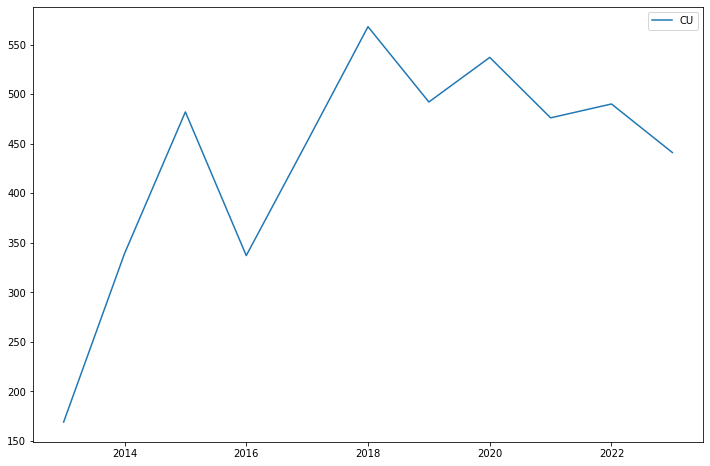

In [ ]:
df_cu.plot(kind='line', figsize=(12,8))

<Axes: >

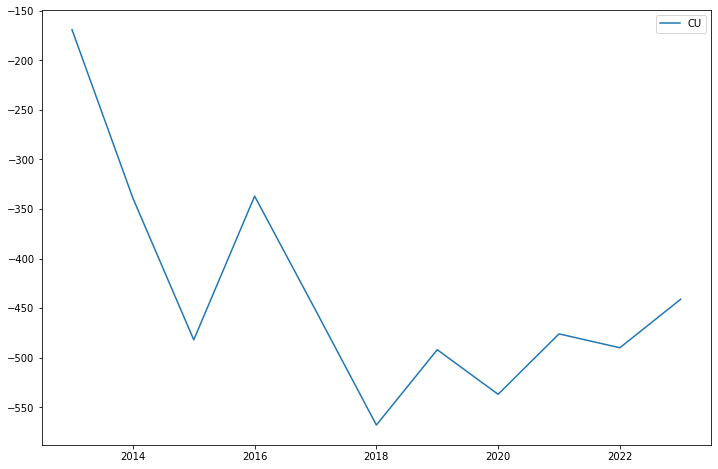

In [ ]:
df_cu = df_cu * -1
df_cu.plot(kind='line', figsize=(12,8))

## <font color='red'>Q2. Thai Nichi อยู่อันดับที่เท่าไหร่</font>

## <font color='red'>Q3. มหาวิทยาลัย ที่ติด 1-10 ในปี 2023</font>

In [ ]:
df1 = df.query( 'year == 2023 and month == 1' ).nsmallest(10, 'ranking')

In [ ]:
df1.university.tolist()

['Chulalongkorn University',
 'Chiang Mai University',
 'Mahidol University',
 'Khon Kaen University',
 'Kasetsart University',
 'Prince of Songkla University',
 "King Mongkut's University of Technology Thonburi",
 'Thammasat University',
 "King Mongkut's University of Technology North Bangkok",
 'Naresuan University']

In [ ]:
df1.head()

,year,month,ranking,world_rank,university,impact,openness,excellence
3679,2023,1,1,441,Chulalongkorn University,559,584,519
3776,2023,1,2,482,Chiang Mai University,263,925,806
3680,2023,1,3,517,Mahidol University,518,777,653
3777,2023,1,4,706,Khon Kaen University,475,1114,1158
3681,2023,1,5,751,Kasetsart University,430,1275,1294


In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='university'>

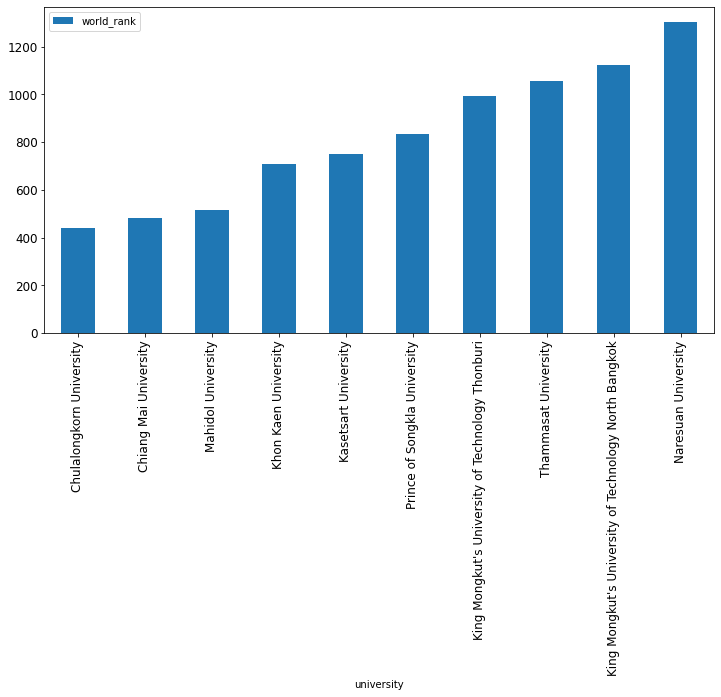

In [ ]:
df1.plot(x='university', \
         y='world_rank', \
         kind="bar", \
         rot=90, fontsize=12,  figsize=(12,6))

## <font color='red'>Q4. หา Average rank ของมหาวิทยาลัยที่ติด 1-10</font>

In [ ]:
df2 = df1[df1.university.isin(df1.university.tolist())]

In [ ]:
df2.head()

,year,month,ranking,world_rank,university,impact,openness,excellence
3679,2023,1,1,441,Chulalongkorn University,559,584,519
3776,2023,1,2,482,Chiang Mai University,263,925,806
3680,2023,1,3,517,Mahidol University,518,777,653
3777,2023,1,4,706,Khon Kaen University,475,1114,1158
3681,2023,1,5,751,Kasetsart University,430,1275,1294


In [ ]:
pd.pivot_table(df2, index=['university'], aggfunc= { 'ranking': 'mean', 'world_rank': 'mean','impact': 'mean'}).sort_values(by='ranking', ascending=True)

,impact,ranking,world_rank
university,,,
Chulalongkorn University,559,1,441
Chiang Mai University,263,2,482
Mahidol University,518,3,517
Khon Kaen University,475,4,706
Kasetsart University,430,5,751
Prince of Songkla University,718,6,832
King Mongkut's University of Technology Thonburi,1212,7,991
Thammasat University,843,8,1054
King Mongkut's University of Technology North Bangkok,1025,9,1124


<Axes: xlabel='university'>

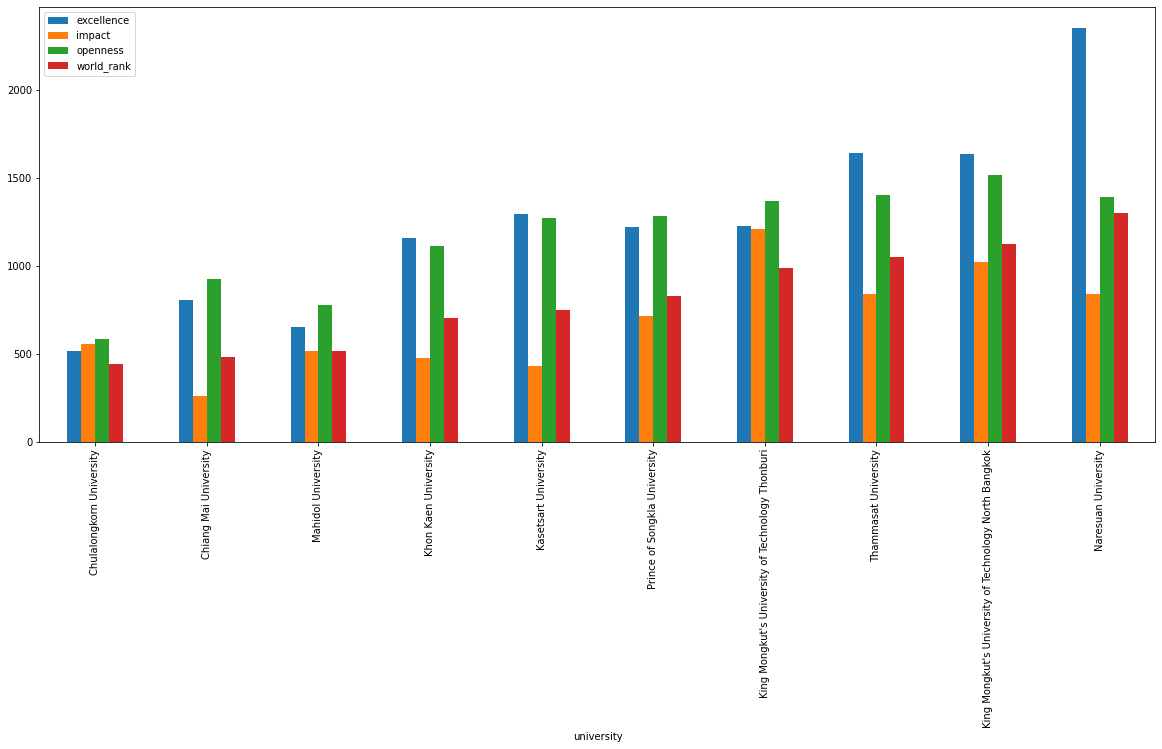

In [ ]:
pd.pivot_table(df2, index=['university'], \
               aggfunc= { 'openness': 'mean', \
                         'excellence': 'mean', \
                         'world_rank': 'mean',\
                         'impact': 'mean'})\
                .sort_values(by='world_rank', ascending=True)\
                .plot(kind='bar', figsize=(20,8))

## <font color='red'>Q5. เปรียบเทียบแนวโน้ม World_Rank 10 ย้อนหลังของมหาลัยที่ติด 1-10 ในปี 2023</font>

In [ ]:
df1.university.tolist()

['Chulalongkorn University',
 'Chiang Mai University',
 'Mahidol University',
 'Khon Kaen University',
 'Kasetsart University',
 'Prince of Songkla University',
 "King Mongkut's University of Technology Thonburi",
 'Thammasat University',
 "King Mongkut's University of Technology North Bangkok",
 'Naresuan University']

In [ ]:
chula = list(df[(df['university']=='Chulalongkorn University') & (df['month']==1)]['world_rank'])
cm = list(df[(df['university']=='Chiang Mai University') & (df['month']==1)]['world_rank'])
mu = list(df[(df['university']=='Mahidol University') & (df['month']==1)]['world_rank'])
kku = list(df[(df['university']=='Khon Kaen University') & (df['month']==1)]['world_rank'])
ku = list(df[(df['university']=='Kasetsart University') & (df['month']==1)]['world_rank'])
year = list(df[(df['month']==1)]['year'].unique())
df_rank = pd.DataFrame({'CU':chula, 
                        'CM':cm,
                        'MU':mu,
                        'KKU':kku,
                        'KU': ku}, index=year)
df_rank

,CU,CM,MU,KKU,KU
2013,169,383,246,436,299
2014,339,280,294,416,459
2015,482,505,308,578,213
2016,337,1023,308,533,1004
2017,452,609,433,651,563
2018,568,746,548,752,751
2019,492,693,593,794,789
2020,537,755,630,809,796
2021,476,700,531,796,805
2022,490,692,600,885,803


<Axes: >

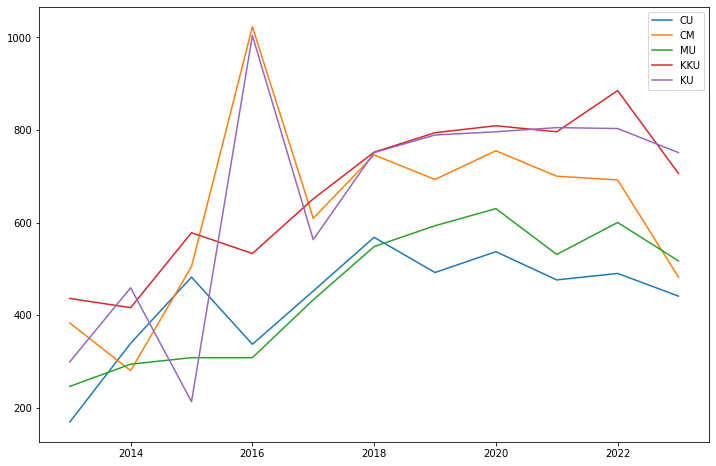

In [ ]:
df_rank = df_rank * 1
df_rank.plot(kind='line', figsize=(12,8))

## <font color='red'>Q6. เปรียบเทียบ Ranking ของมหาวิทยาลัยเอกชน</font>

In [ ]:
print(len(tni))
print(len(su))
print(len(bu))
print(len(pim))
print(len(ru))
print(len(year))

10
10
10
9
10
10


In [ ]:
df[(df['university']=='Panyapiwat Institute of Management')& (df['month']==6) ]['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
tni = list(df[(df['university']=='Thai Nichi Institute of Technology')  & (df['month']==1) & (df['year']!=2023)]['world_rank'])
su = list(df[(df['university']=='Sripatum University')                  & (df['month']==1) & (df['year']!=2023)]['world_rank'])
bu = list(df[(df['university']=='Bangkok University')                   & (df['month']==1) & (df['year']!=2023)]['world_rank'])
pim = list(df[(df['university']=='Panyapiwat Institute of Management')  & (df['month']==1) ]['world_rank'])
ru = list(df[(df['university']=='Rangsit University')                   & (df['month']==1) & (df['year']!=2023)]['world_rank'])
year = list(df[(df['month']==1) & (df['year']!=2023) ]['year'].unique())
df_rank = pd.DataFrame({'TNI':tni,
                        'SU':su,
                        'BU':bu,
                        'PIM':pim,
                        'RU' : ru}, index=year)
df_rank

,TNI,SU,BU,PIM,RU
2013,4792,2431,2344,10783,2651
2014,4609,3367,2107,12263,1652
2015,7069,4122,2793,10712,1708
2016,7093,4265,2619,10489,2125
2017,7522,6272,2967,13233,2768
2018,8237,3680,3446,10233,3099
2019,6204,4467,2744,12008,3301
2020,9033,4603,2773,12111,2676
2021,11632,5668,3465,12328,2658
2022,11796,5471,4054,12645,2919


<Axes: >

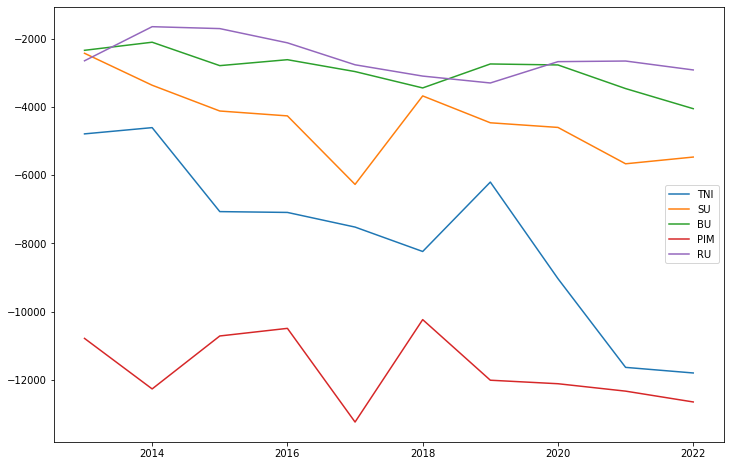

In [ ]:
df_rank = df_rank * -1
df_rank.plot(kind='line', figsize=(12,8))

In [ ]:
tni = list(df[(df['university']=='Thai Nichi Institute of Technology')  & (df['month']==1) & (df['year']!=2023)]['ranking'])
su = list(df[(df['university']=='Sripatum University')                  & (df['month']==1) & (df['year']!=2023)]['ranking'])
bu = list(df[(df['university']=='Bangkok University')                   & (df['month']==1) & (df['year']!=2023)]['ranking'])
pim = list(df[(df['university']=='Panyapiwat Institute of Management')  & (df['month']==1) ]['ranking'])
ru = list(df[(df['university']=='Rangsit University')                   & (df['month']==1) & (df['year']!=2023)]['ranking'])
year = list(df[(df['month']==1) & (df['year']!=2023) ]['year'].unique())
df_rank = pd.DataFrame({'TNI':tni,
                        'SU':su,
                        'BU':bu,
                        'PIM':pim,
                        'RU' : ru}, index=year)
df_rank

,TNI,SU,BU,PIM,RU
2013,66,35,30,139,40
2014,73,53,31,128,25
2015,86,51,34,124,18
2016,91,60,31,104,20
2017,84,69,21,115,19
2018,83,27,24,92,19
2019,55,34,21,101,24
2020,78,39,22,100,19
2021,97,43,29,110,20
2022,102,40,31,114,24


<Axes: >

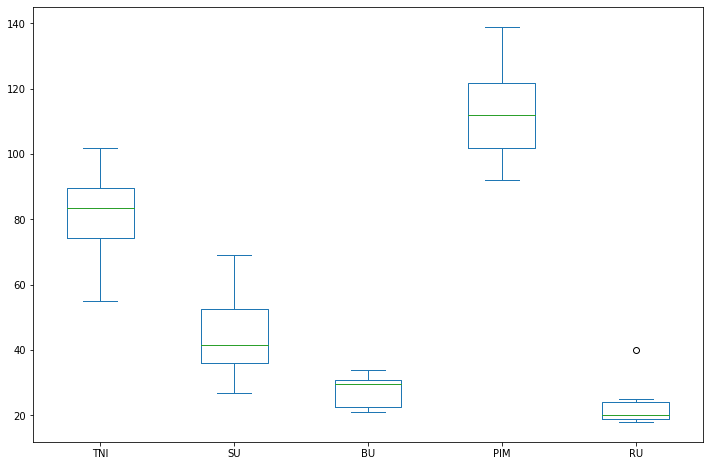

In [ ]:
df_rank.plot(kind='box', figsize=(12,8))

# 4.Data Transformation

In [ ]:
df.university.unique()

array(['Chulalongkorn University', 'Kasetsart University',
       'Khon Kaen University', 'Thammasat University',
       "King Mongkut's Institute of Technology Ladkrabang",
       'Naresuan University', 'Ramkhamhaeng University',
       'Mahasarakham University', 'Silpakorn University',
       'Asian Institute of Technology Thailand',
       'Ubonratchathani University', 'Walailak University',
       'Mahanakorn University of Technology',
       'Huachiew Chalermprakiet University', 'Loei Rajabhat University',
       'Yala Rajabhat University',
       'National Institute of Development Administration',
       'Sripatum University', 'Rajabhat Institute Chandrakasem',
       'Nakhon Pathom Rajabhat University',
       'Nakhon Ratchasima Rajabhat University',
       'Rajamangala University of Technology Thanyaburi',
       'Siam University', 'Rajamangala University of Technology Tawan-Ok',
       'Suan Dusit Rajabhat University', 'Thaksin University',
       'Nakhon Sawan Rajabhat Univer

In [ ]:
def public_private(name):
    private = []
    if 'School' in name:
        return 'Private'
    elif 'University' in name:
        return 'Public'
    else:
        return 'Other'

In [ ]:
def uni_type(name):
    if 'School' in name:
        return 'School'
    elif 'University' in name:
        return 'University'
    elif ('Institute' in name) or ('Institude' in name):
        return 'Institute'
    elif 'College' in name:
        return 'College'
    elif 'Academy' in name:
        return 'Academy'
    elif 'Training Center' in name:
        return 'Training Center'

In [ ]:
df['type'] = df['university'].apply(uni_type)
#df['type'] = df['university'].map(uni_type)

In [ ]:
df.head()

,year,month,ranking,world_rank,university,impact,openness,excellence,type
0,2013.0,1,1.0,169,Chulalongkorn University,68.0,483.0,562.0,University
1,2013.0,1,3.0,299,Kasetsart University,174.0,387.0,1161.0,University
2,2013.0,1,5.0,436,Khon Kaen University,263.0,1156.0,1109.0,University
3,2013.0,1,7.0,514,Thammasat University,312.0,1253.0,1346.0,University
4,2013.0,1,9.0,697,King Mongkut's Institute of Technology Ladkrabang,323.0,2017.0,1538.0,Institute


In [ ]:
df.isnull().sum()

year          0
month         0
ranking       0
world_rank    0
university    0
impact        0
openness      0
excellence    0
type          0
dtype: int64

In [ ]:
df[df['type'].isnull()]

,year,month,ranking,world_rank,university,impact,openness,excellence,type
31,2013.0,1,63.0,4535,Royal Thai Air Force Academy,1744.0,10219.0,5203.0,None
123,2013.0,1,74.0,5653,Chulachomklao Royal Military Academy,6437.0,6051.0,5203.0,None
137,2013.0,1,102.0,8766,Royal Thai Navy Academy,9094.0,10219.0,5203.0,None
222,2013.0,6,97.0,8418,Royal Thai Navy Academy,8171.0,5755.0,5080.0,None
299,2013.0,6,64.0,3750,Royal Thai Air Force Academy,2531.0,7222.0,5080.0,None
...,...,...,...,...,...,...,...,...,...
3667,2022.0,6,172.0,24067,Crème Academy Thailand,23767.0,7521.0,7216.0,None
3726,2023.0,1,95.0,9488,Chulabhorn Royal Academy,10507.0,5362.0,7206.0,None
3748,2023.0,1,139.0,15786,Royal Thai Navy Academy,14491.0,6547.0,7206.0,None
3766,2023.0,1,175.0,24807,Crème Academy Thailand,24628.0,6547.0,7206.0,None


In [ ]:
df[df["type"].apply(lambda x: pd.isna(x))]

,year,month,ranking,world_rank,university,impact,openness,excellence,type
31,2013.0,1,63.0,4535,Royal Thai Air Force Academy,1744.0,10219.0,5203.0,None
123,2013.0,1,74.0,5653,Chulachomklao Royal Military Academy,6437.0,6051.0,5203.0,None
137,2013.0,1,102.0,8766,Royal Thai Navy Academy,9094.0,10219.0,5203.0,None
222,2013.0,6,97.0,8418,Royal Thai Navy Academy,8171.0,5755.0,5080.0,None
299,2013.0,6,64.0,3750,Royal Thai Air Force Academy,2531.0,7222.0,5080.0,None
...,...,...,...,...,...,...,...,...,...
3667,2022.0,6,172.0,24067,Crème Academy Thailand,23767.0,7521.0,7216.0,None
3726,2023.0,1,95.0,9488,Chulabhorn Royal Academy,10507.0,5362.0,7206.0,None
3748,2023.0,1,139.0,15786,Royal Thai Navy Academy,14491.0,6547.0,7206.0,None
3766,2023.0,1,175.0,24807,Crème Academy Thailand,24628.0,6547.0,7206.0,None


In [ ]:
df[df['university'].str.contains('Thai Nichi')].tail()

,year,month,ranking,world_rank,university,impact,openness,excellence,type
2956,2021.0,1,97.0,11632,Thai Nichi Institute of Technology,9704.0,5963.0,6683.0,Institute
3147,2021.0,6,101.0,11957,Thai Nichi Institute of Technology,9747.0,6488.0,6650.0,Institute
3438,2022.0,1,102.0,11796,Thai Nichi Institute of Technology,9323.0,7420.0,7190.0,Institute
3532,2022.0,6,95.0,9469,Thai Nichi Institute of Technology,6619.0,7425.0,7216.0,Institute
3822,2023.0,1,94.0,9458,Thai Nichi Institute of Technology,6367.0,6547.0,7206.0,Institute


In [ ]:
df1 = df[['type','ranking']].groupby('type').agg('count')
df1

,ranking
type,
College,915
Institute,314
School,83
Training Center,20
University,2468


<AxesSubplot:xlabel='type'>

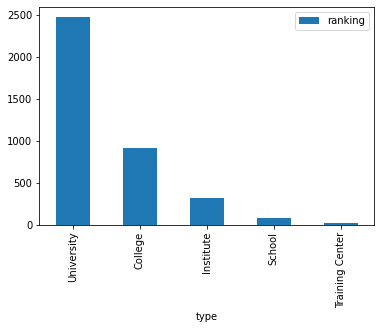

In [ ]:
df[['type','ranking']].groupby('type').agg('count').sort_values(by='ranking', ascending=False).plot(kind='bar')

<AxesSubplot:>

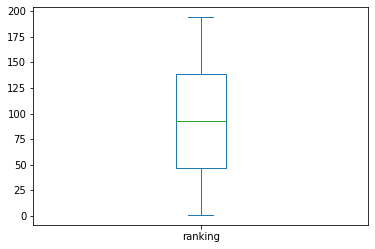

In [ ]:
df['ranking'].plot(kind='box', by=['type'])

# __5.Conclusion and Answer the questions__

### ข้อ 1. ค่าเฉลี่ย Ranking ของมหาวิทยาลัยในประเทศไทย 10 อับดับแรก 10 ปี ย้อนหลัง

In [ ]:
df.groupby('university')[['ranking']]\
    .agg('mean')\
    .sort_values(by='ranking',ascending=True)\
    .head(10)

,ranking
university,
Chulalongkorn University,1.619048
Mahidol University,1.809524
Chiang Mai University,3.523810
Kasetsart University,4.000000
Khon Kaen University,5.095238
Prince of Songkla University,6.142857
King Mongkut's University of Technology Thonburi,7.523810
Thammasat University,8.476190
Suranaree University of Technology,8.904762


In [ ]:
df.groupby('university')[['ranking']]\
    .mean()\
    .sort_values(by='ranking',ascending=True)\
    .head(10)

,ranking
university,
Chulalongkorn University,1.619048
Mahidol University,1.809524
Chiang Mai University,3.523810
Kasetsart University,4.000000
Khon Kaen University,5.095238
Prince of Songkla University,6.142857
King Mongkut's University of Technology Thonburi,7.523810
Thammasat University,8.476190
Suranaree University of Technology,8.904762


In [ ]:
pd.pivot_table(df, index=['university'], aggfunc={'ranking':'mean'}).sort_values(by='ranking', ascending=True).head(10)

,ranking
university,
Chulalongkorn University,1.619048
Mahidol University,1.809524
Chiang Mai University,3.523810
Kasetsart University,4.000000
Khon Kaen University,5.095238
Prince of Songkla University,6.142857
King Mongkut's University of Technology Thonburi,7.523810
Thammasat University,8.476190
Suranaree University of Technology,8.904762


### ข้อ 2. ค่าเฉลี่ย Ranking ของมหาวิทยาลัยในประเทศไทย 10 อับดับแรก  3 ปี ย้อนหลัง

In [ ]:
df[(df['year']==2023)|(df['year']==2022)|(df['year']==2021)]\
    .groupby('university')[['ranking']]\
    .agg('mean')\
    .sort_values(by='ranking',ascending=True)\
    .head(10)

,ranking
university,
Chulalongkorn University,1.0
Mahidol University,2.2
Chiang Mai University,2.8
Khon Kaen University,4.2
Kasetsart University,4.8
Prince of Songkla University,6.0
Thammasat University,7.4
King Mongkut's University of Technology Thonburi,7.8
Naresuan University,9.2


In [ ]:
df[df['year'].isin([2023,2022,2021])].pivot_table(index='university', aggfunc={'ranking':'mean'}).sort_values(by='ranking').head(10)

,ranking
university,
Chulalongkorn University,1.0
Mahidol University,2.2
Chiang Mai University,2.8
Khon Kaen University,4.2
Kasetsart University,4.8
Prince of Songkla University,6.0
Thammasat University,7.4
King Mongkut's University of Technology Thonburi,7.8
Naresuan University,9.2


### ข้อ 3. TNI ติด 10 อันดับแรกในกลุ่มสถาบันหรือไม่

In [ ]:
df[((df['year']==2023)|(df['year']==2022)|(df['year']==2021))&(df['type']=='Institute')]\
.groupby('university')[['ranking']]\
.agg('mean')\
.sort_values(by='ranking',ascending=True).head(10)

,ranking
university,
Asian Institute of Technology Thailand,12.40
King Mongkut's Institute of Technology Ladkrabang,12.40
National Institute of Development Administration,25.00
Vidyasirimedhi Institute of Science and Technology VISTEC,44.75
Bunditpatanasilpa Institute,78.60
Princess Galyani Vadhana Institute of Music,84.60
Pathumwan Institute of Technology,85.20
Thai Nichi Institute of Technology,97.80
Panyapiwat Institute of Management,108.80


### ข้อ 4. แผนภาพแสดง The most top 10 university in 2023? 

In [ ]:
import matplotlib.pyplot as plt

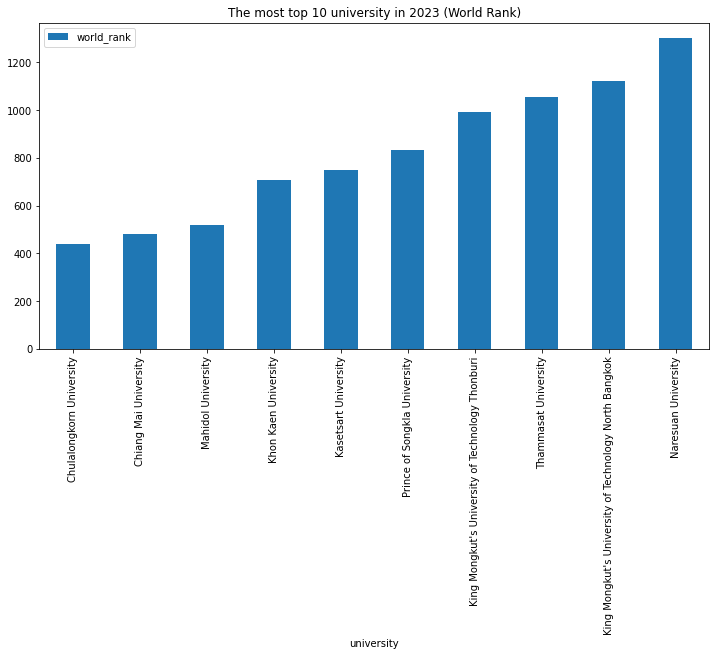

In [ ]:
top_10 = df[(df['year']==2023) & (df['month']==1)].nsmallest(10, 'world_rank')
top_10.index = top_10.university
top_10[['university','world_rank']].plot(kind='bar', figsize=(12,6))
plt.title('The most top 10 university in 2023 (World Rank)')
plt.show()

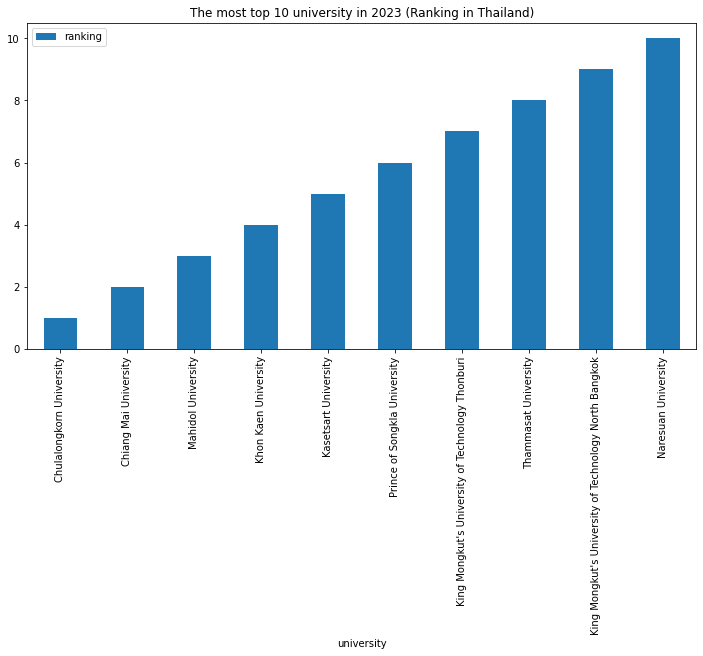

In [ ]:
top_10 = df[(df['year']==2023) & (df['month']==1)].nsmallest(10, 'ranking')
top_10.index = top_10.university
top_10[['university','ranking']].plot(kind='bar', figsize=(12,6))
plt.title('The most top 10 university in 2023 (Ranking in Thailand)')
plt.show()

### ข้อ 5. Trending of the selected university in the last 10 year? 

In [ ]:
chula = list(df[(df['university']=='Chulalongkorn University') & (df['month']==1)]['world_rank'])
cm = list(df[(df['university']=='Chiang Mai University') & (df['month']==1)]['world_rank'])
mu = list(df[(df['university']=='Mahidol University') & (df['month']==1)]['world_rank'])
kku = list(df[(df['university']=='Khon Kaen University') & (df['month']==1)]['world_rank'])
ku = list(df[(df['university']=='Kasetsart University') & (df['month']==1)]['world_rank'])
year = list(df[(df['month']==1)]['year'].unique())
df_rank = pd.DataFrame({'chula':chula, 
                        'cm':cm,
                        'mu':mu,
                        'kku':kku,
                        'ku':ku}, index=year)
df_rank

,chula,cm,mu,kku,ku
2013.0,169,383,246,436,299
2014.0,339,280,294,416,459
2015.0,482,505,308,578,213
2016.0,337,1023,308,533,1004
2017.0,452,609,433,651,563
2018.0,568,746,548,752,751
2019.0,492,693,593,794,789
2020.0,537,755,630,809,796
2021.0,476,700,531,796,805
2022.0,490,692,600,885,803


<AxesSubplot:>

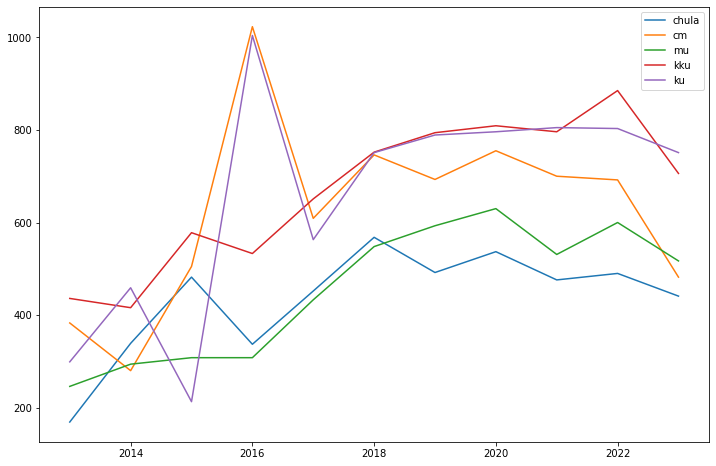

In [ ]:
df_rank.plot(kind='line', figsize=(12,8))

In [ ]:
tni = list(df[(df['university']=='Thai Nichi Institute of Technology') & (df['month']==1) & (df['year']!=2013)]['world_rank'])
su = list(df[(df['university']=='Sripatum University') & (df['month']==1 & (df['year']!=2013))]['world_rank'])
bu = list(df[(df['university']=='Bangkok University') & (df['month']==1 & (df['year']!=2013))]['world_rank'])
pim = list(df[(df['university']=='Panyapiwat Institute of Management') & (df['month']==1 )]['world_rank'])
year = list(df[(df['month']==1) & (df['year']!=2013)]['year'].unique())
df_rank = pd.DataFrame({'tni':tni,
                        'su':su,
                        'bu':bu,
                        'pim':pim}, index=year)
df_rank

,tni,su,bu,pim
2014.0,4609,3367,2107,10783
2015.0,7069,4122,2793,12263
2016.0,7093,4265,2619,10712
2017.0,7522,6272,2967,10489
2018.0,8237,3680,3446,13233
2019.0,6204,4467,2744,10233
2020.0,9033,4603,2773,12008
2021.0,11632,5668,3465,12111
2022.0,11796,5471,4054,12328
2023.0,9458,5776,4011,12645


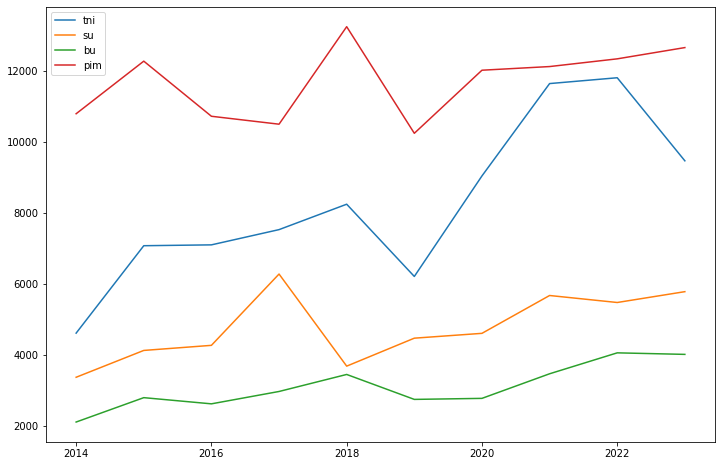

In [ ]:
df_rank.plot.line(figsize=(12,8))

# 6.Data Visualization with plotly

In [ ]:
!pip install -q plotly==4.2.1
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 3.9 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df['type'].unique()

array(['University', 'Institute', None, 'College', 'School',
       'Training Center'], dtype=object)

In [ ]:
University = df[df['type'] == 'University']['type'].value_counts()
Institute = df[df['type'] == 'Institute']['type'].value_counts()
Academy = df[df['type'] == 'Academy']['type'].value_counts()
College = df[df['type'] == 'College']['type'].value_counts()
School = df[df['type'] == 'School']['type'].value_counts()
Training = df[df['type'] == 'Training Center']['type'].value_counts()

In [ ]:
df1 = pd.DataFrame([University, Institute, Academy, College, School,Training])
#df1.index = ['University', 'Institute', 'Academy', 'College', 'School', 'Training'] 
df1.index = df['type'].unique().tolist()
df1

,University,Institute,Academy,College,School,Training Center
University,2468.0,NaN,NaN,NaN,NaN,NaN
Institute,NaN,314.0,NaN,NaN,NaN,NaN
Academy,NaN,NaN,72.0,NaN,NaN,NaN
College,NaN,NaN,NaN,915.0,NaN,NaN
School,NaN,NaN,NaN,NaN,83.0,NaN
Training Center,NaN,NaN,NaN,NaN,NaN,20.0


In [ ]:
df1.iplot(kind='bar', title = 'Data University Distribution', 
          xTitle='Type', 
          yTitle='Amount',
          dimensions =(1000,400))

In [ ]:
df['type'].iplot(kind='hist', title = 'Data University Distribution')

In [ ]:
df.columns

Index(['year', 'month', 'ranking', 'world_rank', 'university', 'impact',
       'openness', 'excellence', 'type'],
      dtype='object')

In [ ]:
df['world_rank'].iplot(kind='box', 
                       title = 'World Rank Distribution in Thailand', 
                       color='#ff1100')

In [ ]:
df[df['type']=='University']['world_rank'].iplot(kind='box', 
                       title = 'World Rank Distribution in Thailand', 
                       color='#ff1100')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.head()

,year,month,ranking,world_rank,university,impact,openness,excellence,type
0,2013.0,1,1.0,169,Chulalongkorn University,68.0,483.0,562.0,University
1,2013.0,1,3.0,299,Kasetsart University,174.0,387.0,1161.0,University
2,2013.0,1,5.0,436,Khon Kaen University,263.0,1156.0,1109.0,University
3,2013.0,1,7.0,514,Thammasat University,312.0,1253.0,1346.0,University
4,2013.0,1,9.0,697,King Mongkut's Institute of Technology Ladkrabang,323.0,2017.0,1538.0,Institute


In [ ]:
df.isnull().sum()

year          0
month         0
ranking       0
world_rank    0
university    0
impact        0
openness      0
excellence    0
type          0
dtype: int64

In [ ]:
df[['world_rank','ranking','impact']].iplot(kind='box',
                           yTitle='y axis title', 
                           title='chart title', 
                           subplots=True, 
                           shape=(1, 3))

In [ ]:
df[((df['university']=='Chulalongkorn University') \
   | (df['university']=='Chiang Mai University')\
   | (df['university']=='Mahidol University')\
   | (df['university']=='Khon Kaen University')\
   | (df['university']=='Kasetsart University')\
   | (df['university']=='Prince of Songkla University'))\
   & df['month']==1 ][['year','university','ranking']]

,year,university,ranking
0,2013.0,Chulalongkorn University,1.0
1,2013.0,Kasetsart University,3.0
2,2013.0,Khon Kaen University,5.0
87,2013.0,Mahidol University,2.0
88,2013.0,Chiang Mai University,4.0
...,...,...,...
3680,2023.0,Mahidol University,3.0
3681,2023.0,Kasetsart University,5.0
3776,2023.0,Chiang Mai University,2.0
3777,2023.0,Khon Kaen University,4.0


In [ ]:
df2 = pd.DataFrame({ 'cu' : df[(df['university']=='Chulalongkorn University') & (df['month']==1) ]['world_rank'].tolist() ,
                     'cmu': df[(df['university']=='Chulalongkorn University') & (df['month']==1) ]['world_rank'].tolist(),
                     'mu': df[(df['university']=='Mahidol University') & (df['month']==1) ]['world_rank'].tolist(),
                    'kku': df[(df['university']=='Khon Kaen University') & (df['month']==1) ]['world_rank'].tolist(),
                    'ku': df[(df['university']=='Kasetsart University') & (df['month']==1) ]['world_rank'].tolist(),
                    'psu': df[(df['university']=='Prince of Songkla University') & (df['month']==1) ]['world_rank'].tolist(),
                   })
df2.index = df[(df['university']=='Chulalongkorn University') & (df['month']==1) ]['year'].astype(int).tolist()
df2

,cu,cmu,mu,kku,ku,psu
2013,169,169,246,436,299,499
2014,339,339,294,416,459,341
2015,482,482,308,578,213,668
2016,337,337,308,533,1004,690
2017,452,452,433,651,563,899
2018,568,568,548,752,751,1068
2019,492,492,593,794,789,1086
2020,537,537,630,809,796,1102
2021,476,476,531,796,805,1103
2022,490,490,600,885,803,917


In [ ]:
df2.iplot(kind='box',
                yTitle='y axis title', 
                title='chart title', 
                subplots=True, 
                shape=(1,6))

In [ ]:
df2.iplot(kind='box',
                yTitle='y axis title', 
                title='chart title', 
                subplots=False, 
                shape=(1,6))

# Conclusion

__บทสรุปที่ได้จากการวิเคราะห์__
- จุฬาเคยติดอันดับโลกที่น้อยที่สุดคือ ปี 2013 อยู่อันดับที่ 169 และในปี 2023 อยู่อันดับที่ 441 (ลดลง 272 อันดับ ในระยะเวลา 10 ปี)
- ม.เชียงใหม่ ติดอันดับโลกที่น้อยที่สุดคือ ปี 2014 อยู่อันดับที่ 280 ในปี 2013 อยู่อันดับที่ 383 เพิ่มขึ้นมากกว่า 100 อันดับภายใน 1 ปี 
- ในปี 2013 ม.เชียงใหม่อันดับอยู่ห่างจากจุฬา 214 อันดับ
- ในปี 2023 ม.เชียงใหม่อันดับอยู่ห่างจากจุฬา 41 อันดับ
- มหิดล เคยติดอันดับ 1 ของมหาวิทยาลัยในไทย ช่วงปี 2014-2018

__ข้อเสนอแนะ__

- เพื่อการเพิ่มอันดับ Ranking ควรปรับปรุงเว็บไซต์ของมหาวิทยาลัย ให้เว็บไซต์ภายในของแต่ละหน่วยงานควรอยู่ภายใต้ domain เดียวกัน
- ควรให้บุคลากรภายในมหาวิทยาลัยมีส่วนร่วมในการเผยแพร่ข้อมูลทางวิชาการ อาทิเช่น เปิดโอกาสให้อาจารย์ได้นำเสนอผลงานทางวิชาการในรูปแบบของ e-Journals ซึ่งจะเป็นการเพิ่ม ค่าของ Impact หรือ การเชื่อมโยงจากภายนอกไปในตัว
- มีการนำเสนอข้อมูลในรูปแบบของภาษาอังกฤษนอกเหนือจากภาษาไทย เพื่อเพิ่มโอกาสในการอ้างอิงจากต่างประเทศที่หลากหลายขึ้น
- วิเคราะห์ SEO เพื่อจะทำให้ Robot ของ Search Engine ค้นหาข้อมูลจากเว็บไซต์ได้ง่ายขึ้น

ปัจจุบันมีสถาบันจัดอันดับมหาวิทยาลัยโลกมากถึง 40 แห่ง ยกตัวอย่าง 3 แห่งที่ได้รับความนิยม
1. Times Higher Education (THE)
2. QS World University Rankings (QS)
3. Academic Ranking of World Universities (ARWU)

__Times Higher Education__ คือสถาบันจัดอันดับจากสหราชอาณาจักรที่เผยแพร่การจัดอันดับมหาวิทยาลัยโลกมาตั้งแต่ปี ค.ศ.2010 โดยในปัจจุบันมีเกณฑ์การจัดอันดับ ดังนี้
1. คุณภาพการสอน (30%)
2. งานวิจัย (30%) วัดจากคุณภาพและปริมาณงานวิจัยจากแต่ละสถาบัน โดยดูจากชื่อเสียงและรายได้ของงานวิจัย
3. การอ้างอิงงานวิจัย (30%)
4. สัดส่วนของนักศึกษา ผู้สอน หรือการร่วมมือกับสถาบันต่างชาติ (7.5%)
5. รายได้จากนวัตกรรม หรือภาคอุตสาหกรรม (2.5%)

__QS World University Rankings__ คือการจัดอันดับมหาวิทยาลัยโลก โดยบริษัท Quacquarelli Symonds จากสหราชอาณาจักร ซึ่งเป็นบริษัทที่เชี่ยวชาญด้านการวิเคราะห์ข้อมูลการศึกษาระดับอุดมศึกษา มีการร่วมมือกับสถาบัน Times Higher Education ในการจัดอันดับมาตั้งแต่ ปี ค.ศ.2004 แต่ได้มีการแยกตัวออกมาจัดอันดับด้วยเกณฑ์ของตัวเองเมื่อปี ค.ศ.2010 โดยในปัจจุบันมีเกณฑ์การจัดอันดับ ดังนี้
1. ชื่อเสียงของสถาบัน (40%) วัดจากการสำรวจความคิดเห็นจากผู้เชี่ยวชาญด้านในระดับอุดมศึกษา เกี่ยวกับคุณภาพการสอนและงานวิจัย
2. สัดส่วนผู้สอนต่อนักศึกษา (20%) โดยสถาบัน QS มองว่ายิ่งมีจำนวนผู้สอนที่มากเท่าไหร่ ก็จะช่วยลดภาระด้านการสอนของผู้สอนแต่ละคน
3. การอ้างอิงงานวิจัย (20%) โดยวัดจากจำนวนงานวิจัยจากสถาบันในช่วง 5 ปีย้อนหลัง เทียบกับจำนวนอาจารย์ผู้สอนในแต่ละสถาบัน
4. ชื่อเสียงในหมู่ผู้ว่าจ้าง (10%) วัดจากการสำรวจความคิดเห็นจากผู้ว่าจ้าง เกี่ยวกับความพร้อมในการทำงานของผู้ที่จบจากสถาบันนั้น ๆ
5. สัดส่วนผู้สอนชาวต่างชาติ (5%)
6. สัดส่วนนักศึกษาต่างชาติ (5%)

__Academic Ranking of World Universities__ คือการจัดอันดับมหาวิทยาลัยโลก โดย Shanghai Jiao Tong University จากประเทศจีนมีการจัดอันดับครั้งแรกเมื่อปี ค.ศ.2003 โดยในปัจจุบันมีเกณฑ์การจัดอันดับ ดังนี้
1. จำนวนศิษย์เก่าที่ได้รับ Nobel Prize หรือ Fields Medals (10%)
2. จำนวนผู้สอนที่ได้รับ Nobel Prize หรือ Fields Medals (20%)
3. จำนวนนักวิจัยที่ได้รับการยอมรับ (20%)
4. จำนวนงานวิจัยที่ได้รับการตีพิมพ์ในนิตยสาร Nature and Science (20%) ในกรณีที่เป็นสถาบันด้านมนุษยศาสตร์ หรือสังคมศาสตร์ น้ำหนักคะแนนด้านนี้จะถูกโอนไปยังเกณฑ์อื่น
5. จำนวนงานวิจัยที่ถูกบันทึกลงในดรรชนี Science Citation Index-Expanded and Social Science Citation Index (20%)
6. สัดส่วนผลงานทั้งหมด ต่อจำนวนผู้สอนในสถาบัน (10%)